In [176]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(plt.imread('download.jpg') , cv2.COLOR_RGB2GRAY)


In [177]:
# resizing the image
def resize(img):
    resized_img = cv2.resize(img, (500, 500), interpolation=cv2.INTER_AREA)
    # plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    # plt.show()
    return resized_img

In [178]:
#Gausian noise 

# Define the mean and standard deviation of the Gaussian noise
means = [0, 0.5, 1]
stds = [1, 10 , 30]

noise = np.random.normal(means[0] , stds[0] , img.shape)
Gausian_noise1 = img + noise

noise = np.random.normal(means[1] , stds[1] , img.shape)
Gausian_noise2 = img + noise

noise = np.random.normal(means[2] , stds[2] , img.shape)
Gausian_noise3 = img + noise


In [179]:
# Salt_and_Pepper_Noise
def Salt_and_Pepper_Noise(probability , image):
    
    # we do the copy because we do not want to change the original image 
    noisy_img = np.copy(image)
    row , col = img.shape 
    # Add salt noise (number of pixels that we will change it to white)
    num_salt = np.ceil(probability * image.size * 0.5)

    for i in range(1 ,int(num_salt)):
        # coords = [np.random.randint(0, row - 1 , int(num_salt)) for i in image.shape]
        noisy_img[np.random.randint(0, row - 1)][np.random.randint(0, col - 1)] = 255
   
    
    # -----------------------------------------------------------------------------

    # Add pepper noise (number of pixels that we will change it to black)
    num_pepper = np.ceil(probability * img.size * 0.5)

    for i in range(1 , int(num_pepper)):
        # coords = [np.random.randint(0, row - 1 , int(num_salt)) for i in image.shape]
        noisy_img[np.random.randint(0, row - 1)][np.random.randint(0, col - 1)] = 0


    return noisy_img


In [180]:
# aplying the salt-and-pepper noise 

# Define the probability of salt and pepper noise
probability = [0.01, 0.05, 0.1]

salt_and_pepper1 = Salt_and_Pepper_Noise(probability[0] , img)
salt_and_pepper2 = Salt_and_Pepper_Noise(probability[1] , img)
salt_and_pepper3 = Salt_and_Pepper_Noise(probability[2] , img)


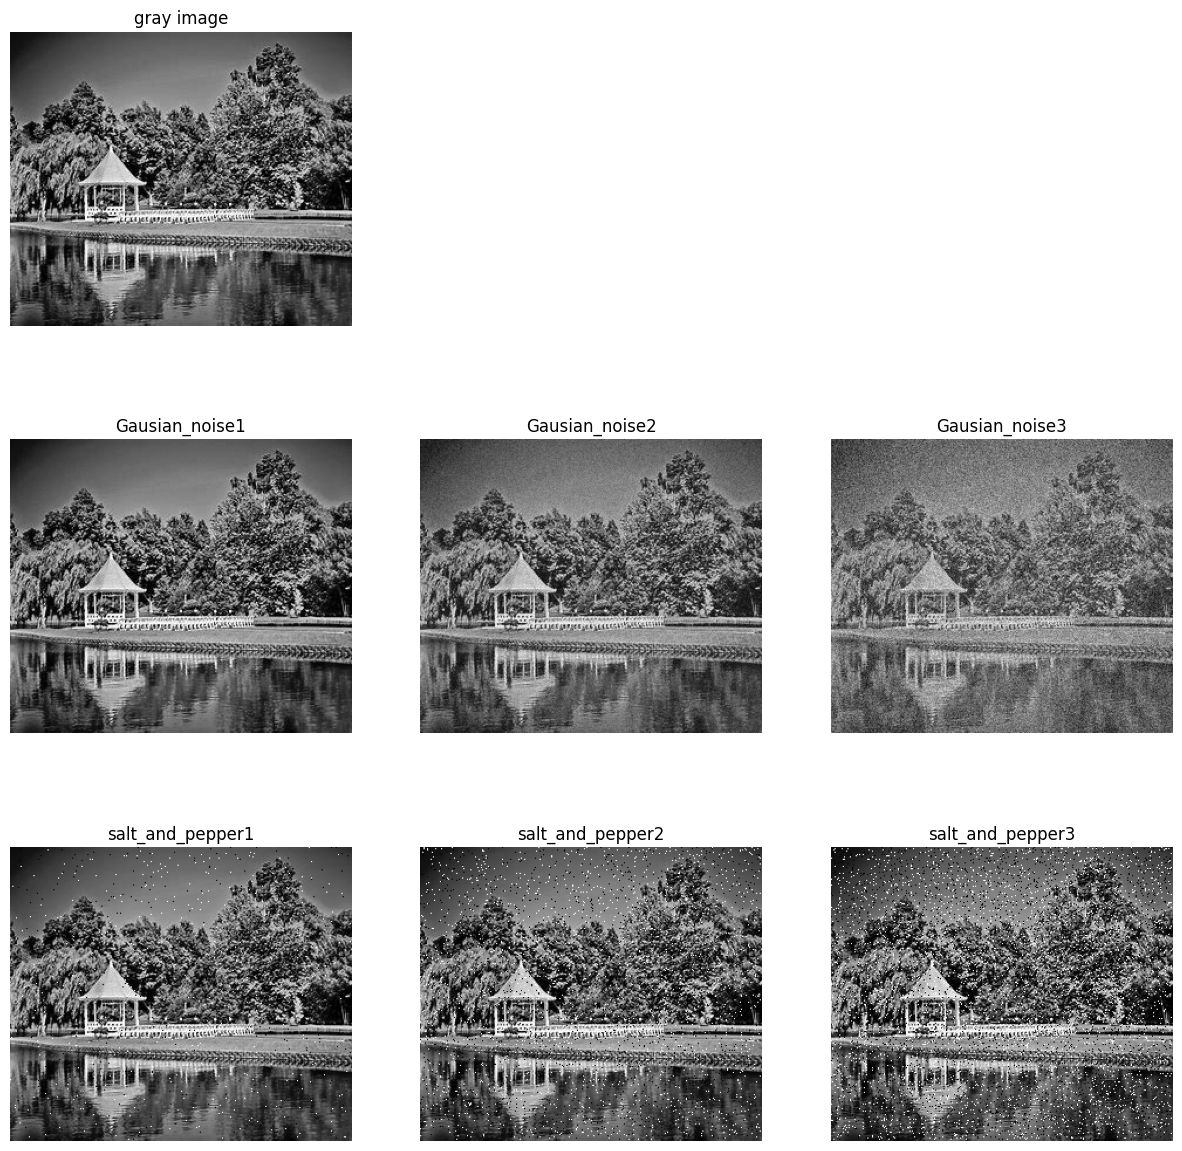

In [181]:
# plot 1 
# Create a 3x3 grid of subplots
fig = plt.figure(figsize=(15, 15)) 

# Add a subplot at the 1st position 
fig.add_subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("gray image")
plt.axis('off') 

fig.add_subplot(3, 3, 4)
plt.imshow(Gausian_noise1, cmap='gray')
plt.title("Gausian_noise1")
plt.axis('off') 

fig.add_subplot(3, 3, 5)
plt.imshow(Gausian_noise2, cmap='gray')
plt.title("Gausian_noise2")
plt.axis('off') 

fig.add_subplot(3, 3, 6)
plt.imshow(Gausian_noise3, cmap='gray')
plt.title("Gausian_noise3")
plt.axis('off') 

fig.add_subplot(3, 3, 7)
plt.imshow(salt_and_pepper1, cmap='gray')
plt.title("salt_and_pepper1")
plt.axis('off') 

fig.add_subplot(3, 3, 8)
plt.imshow(salt_and_pepper2, cmap='gray')
plt.title("salt_and_pepper2")
plt.axis('off') 

fig.add_subplot(3, 3, 9)
plt.imshow(salt_and_pepper3, cmap='gray')
plt.title("salt_and_pepper3")
plt.axis('off') 

# Show the plot
plt.show()

In [220]:
# freq. domain
def frequancy_domain(image):
    # change from spcial domain to frequency domain (forier transform)
    dft = np.fft.fft2(image , axes = (0 , 1))

    # change the origin of the image from top left to the center 
    dft_shift = np.fft.fftshift(dft)

    # to generate the spectrum that holds some data of fourer transform to see what is in the frequency domain
    magnitude = np.abs(dft_shift)
    spectrum = np.log(magnitude) / 20

    #plt.imshow(spectrum)
    # plt.imshow(spectrum , cmap='gray')

    return spectrum

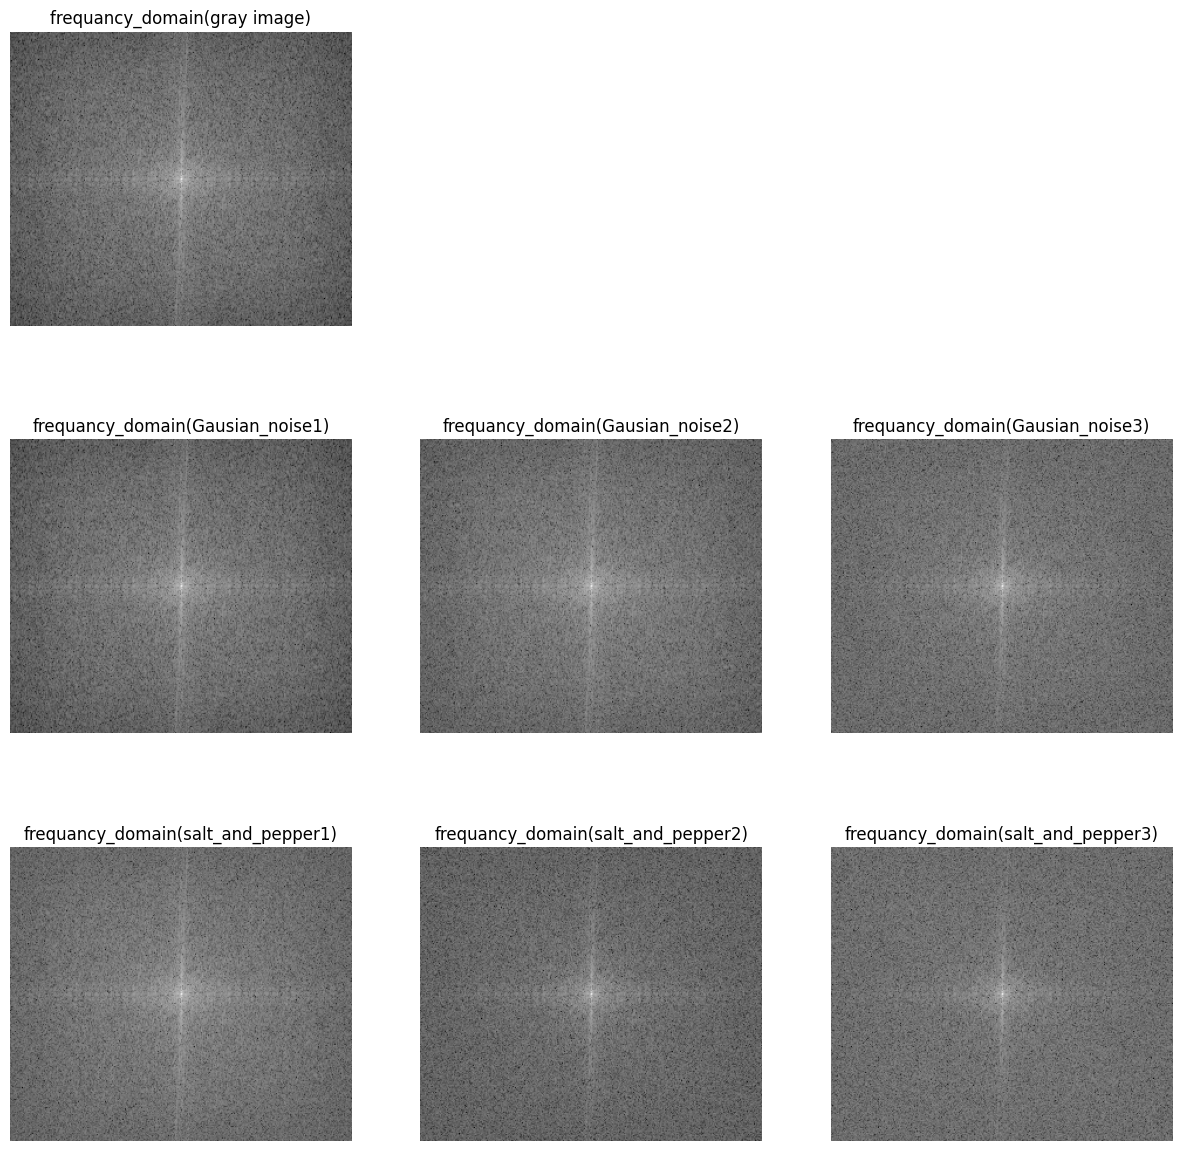

In [221]:
# plot 2
# Create a 3x3 grid of subplots
fig = plt.figure(figsize=(15, 15)) 

# Add a subplot at the 1st position 
fig.add_subplot(3, 3, 1)
plt.imshow(frequancy_domain(img) , cmap='gray')
plt.title("frequancy_domain(gray image)")
plt.axis('off') 

fig.add_subplot(3, 3, 4)
plt.imshow(frequancy_domain(Gausian_noise1), cmap='gray')
plt.title("frequancy_domain(Gausian_noise1)")
plt.axis('off') 

fig.add_subplot(3, 3, 5)
plt.imshow(frequancy_domain(Gausian_noise2), cmap='gray')
plt.title("frequancy_domain(Gausian_noise2)")
plt.axis('off') 

fig.add_subplot(3, 3, 6)
plt.imshow(frequancy_domain(Gausian_noise3), cmap='gray')
plt.title("frequancy_domain(Gausian_noise3)")
plt.axis('off') 

fig.add_subplot(3, 3, 7)
plt.imshow(frequancy_domain(salt_and_pepper1), cmap='gray')
plt.title("frequancy_domain(salt_and_pepper1)")
plt.axis('off') 

fig.add_subplot(3, 3, 8)
plt.imshow(frequancy_domain(salt_and_pepper2), cmap='gray')
plt.title("frequancy_domain(salt_and_pepper2)")
plt.axis('off') 

fig.add_subplot(3, 3, 9)
plt.imshow(frequancy_domain(salt_and_pepper3), cmap='gray')
plt.title("frequancy_domain(salt_and_pepper3)")
plt.axis('off') 

# Show the plot
plt.show()

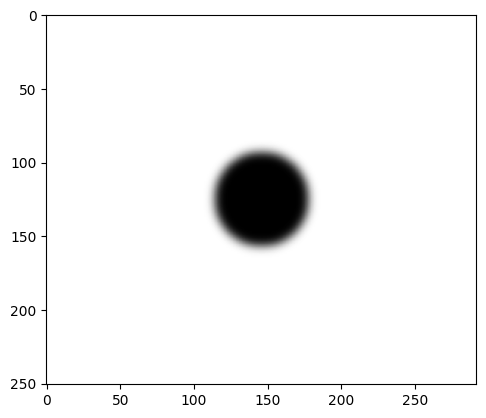

In [184]:
# mask
radius = 32

#make the image black (the black circle without bluring the edges)
mask = np.zeros_like(img)

# get the center of the image
# cy = mask.shape[0] // 2
# cx = mask.shape[1] // 2

# draw the circle on the mask with radius 32 and the center cx , cy and colored it with white
cv2.circle(mask , (cx , cy) , radius , (255 , 255 , 255) , -1)[0]

# if we want to blure the mask 
# note that the (255 -) is just the difference between the low and the high pass filter
# make the edges blure
mask_blure = 255 - cv2.GaussianBlur(mask , (19 , 19) , 0) 
plt.imshow(mask_blure , cmap='gray')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20404\1107411860.py:7: RuntimeWarning: divide by zero encountered in log
  spectrum = np.log(magnitude) / 20


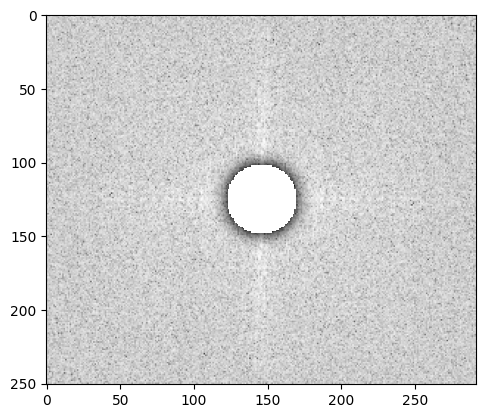

In [185]:
# masked_image
# apply the mask to dft_shift (frequency domain) 
# multiply the dft_shift (freq. domain) with the mask 
dft_shift_mask = np.multiply(dft_shift , mask) /255
dft_shift_mask_blure = np.multiply(dft_shift , mask_blure) /255

# get the magnitude and the spectrum to see the result of the multiplication
magnitude = np.abs(dft_shift_mask_blure)
spectrum = np.log(magnitude) / 20
plt.imshow(spectrum , cmap='gray')


In [218]:
# high pass filter
def high1(img):
    #high pass filter

    radius = 32
    mask = np.zeros_like(img)

    # cy = mask.shape[0] // 2
    # cx = mask.shape[1] // 2

    cv2.circle(mask , (cx , cy) , radius , (255 , 255 , 255) , -1)[0]

    # if we want to blure the mask 
    # note that the (255 -) is just the difference between the low and the high pass filter
    mask_blure = 255 - cv2.GaussianBlur(mask , (19 , 19) , 0) 
    # plt.imshow(mask_blure , cmap='gray')

    # ------------------------------------------------------------------
    # change from spcial domain to frequency domain (forier transform)
    dft = np.fft.fft2(img , axes = (0 , 1))

    # change the origin of the image from top left to the center 
    dft_shift = np.fft.fftshift(dft)

    # to generate the spectrum that holds some data of fourer transform to see what is in the frequency domain
    magnitude = np.abs(dft_shift)
    spectrum = np.log(magnitude) / 20

    # ------------------------------------------------------------------

    # apply the mask to dft_shift (frequency domain)
    dft_shift_mask = np.multiply(dft_shift , mask) /255
    dft_shift_mask_blure = np.multiply(dft_shift , mask_blure) /255

    magnitude = np.abs(dft_shift_mask_blure)
    spectrum = np.log(magnitude) / 20
    # plt.imshow(spectrum , cmap='gray')

    # ------------------------------------------------------------------
    # by applying the high pass filter

    #first : return the origin to the upper left corner (We return everything as it was)
    inverse1 = np.fft.ifftshift(dft_shift)
    #second: make the inverse transform 
    inversed_iamge = np.fft.ifft2(inverse1 , axes=(0 , 1))
    # third : To get the picture back to how it was, we do the abs (because it returns complex numbers above)
    inversed_iamge = np.abs(inversed_iamge).clip(0 , 255).astype(np.uint8)

    # do the same steps tp return the masked image
    inverse_masked = np.fft.ifftshift(dft_shift_mask)
    inversed_iamge_mask = np.fft.ifft2(inverse_masked , axes=(0 , 1))
    inversed_iamge_mask = np.abs(inversed_iamge_mask).clip(0 , 255).astype(np.uint8)

    # do the same steps tp return the masked image with blured edges
    inverse_masked_blured = np.fft.ifftshift(dft_shift_mask_blure)
    inversed_iamge_blured = np.fft.ifft2(inverse_masked_blured , axes=(0 , 1))
    inversed_iamge_blured = np.abs(inversed_iamge_blured).clip(0 , 255).astype(np.uint8)

    return inversed_iamge , inversed_iamge_mask , inversed_iamge_blured



C:\Users\lenovo\AppData\Local\Temp\ipykernel_20404\677024276.py:35: RuntimeWarning: divide by zero encountered in log
  spectrum = np.log(magnitude) / 20


<Figure size 1500x1500 with 0 Axes>

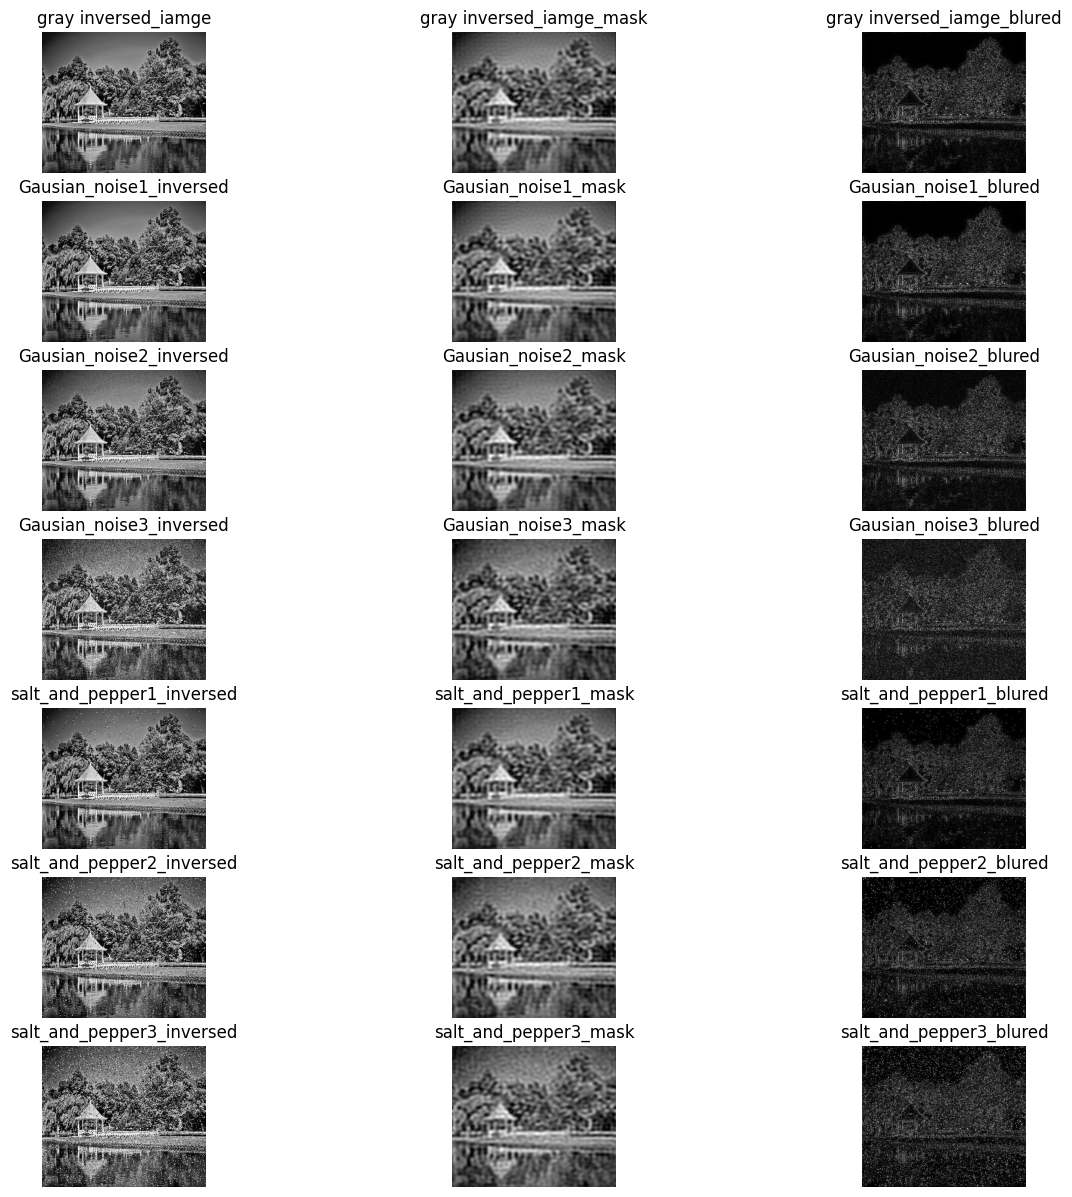

In [219]:
#plot 3
fig = plt.figure(figsize=(15, 15)) 

p1 , p2 , p3 = high1(img)
p4 , p5 , p6 = high1(Gausian_noise1)
p7 , p8 , p9 = high1(Gausian_noise2)
p10 , p11 , p12 = high1(Gausian_noise3)
p13 , p14 , p15 = high1(salt_and_pepper1)
p16 , p17 , p18 = high1(salt_and_pepper2)
p19 , p20 , p21 = high1(salt_and_pepper3)

arr = [p1 , p2 ,p3 , p4 , p5 , p6 , p7 , p8 , p9 , p10 , p11 , p12 , p13 , p14 , p15 , p16 , p17 , p18 , p19 , p20 , p21]
# plot 3

# Create a 7x3 grid of subplots
fig = plt.figure(figsize=(15, 15)) 

arr_name = ["gray inversed_iamge" , "gray inversed_iamge_mask", "gray inversed_iamge_blured" ,
            "Gausian_noise1_inversed" , "Gausian_noise1_mask" , "Gausian_noise1_blured" ,
            "Gausian_noise2_inversed" , "Gausian_noise2_mask" , "Gausian_noise2_blured",
            "Gausian_noise3_inversed" , "Gausian_noise3_mask", "Gausian_noise3_blured",
            "salt_and_pepper1_inversed" , "salt_and_pepper1_mask" , "salt_and_pepper1_blured",
            "salt_and_pepper2_inversed" , "salt_and_pepper2_mask" , "salt_and_pepper2_blured" , 
            "salt_and_pepper3_inversed" , "salt_and_pepper3_mask" , "salt_and_pepper3_blured"]

for i in range(1 , 22):
    fig.add_subplot(7, 3, i)
    plt.imshow(arr[i-1], cmap='gray')
    plt.title(arr_name[i-1])
    plt.axis('off')


plt.show()
